# COCO Dataset

In [1]:
# COCO 데이터셋 정보 확인 예제
from pycocotools.coco import COCO
import os

# 경로 설정
coco_dir = "/home/jinjinjara1022/AutonomousDriving/datasets/coco"
ann_file = os.path.join(coco_dir, "annotations", "instances_train2017.json")

# COCO 객체 생성
coco = COCO(ann_file)

# 카테고리 확인
cats = coco.loadCats(coco.getCatIds())
print(f"총 카테고리 수: {len(cats)}")
print("카테고리 목록:")
for c in cats:
    print(f"  {c['id']}: {c['name']}")

# 이미지 정보 하나 확인
img_ids = coco.getImgIds()
print(f"\n총 이미지 수: {len(img_ids)}")
img_info = coco.loadImgs(img_ids[0])[0]
print(f"첫 번째 이미지 정보: {img_info}")

# 해당 이미지의 annotation 확인
ann_ids = coco.getAnnIds(imgIds=img_info['id'])
anns = coco.loadAnns(ann_ids)
print(f"\nAnnotation 개수: {len(anns)}")
for ann in anns[:5]:  # 앞에서 5개만 출력
    print(ann)


loading annotations into memory...
Done (t=19.01s)
creating index...
index created!
총 카테고리 수: 80
카테고리 목록:
  1: person
  2: bicycle
  3: car
  4: motorcycle
  5: airplane
  6: bus
  7: train
  8: truck
  9: boat
  10: traffic light
  11: fire hydrant
  13: stop sign
  14: parking meter
  15: bench
  16: bird
  17: cat
  18: dog
  19: horse
  20: sheep
  21: cow
  22: elephant
  23: bear
  24: zebra
  25: giraffe
  27: backpack
  28: umbrella
  31: handbag
  32: tie
  33: suitcase
  34: frisbee
  35: skis
  36: snowboard
  37: sports ball
  38: kite
  39: baseball bat
  40: baseball glove
  41: skateboard
  42: surfboard
  43: tennis racket
  44: bottle
  46: wine glass
  47: cup
  48: fork
  49: knife
  50: spoon
  51: bowl
  52: banana
  53: apple
  54: sandwich
  55: orange
  56: broccoli
  57: carrot
  58: hot dog
  59: pizza
  60: donut
  61: cake
  62: chair
  63: couch
  64: potted plant
  65: bed
  67: dining table
  70: toilet
  72: tv
  73: laptop
  74: mouse
  75: remote
  76:

loading annotations into memory...
Done (t=24.13s)
creating index...
index created!


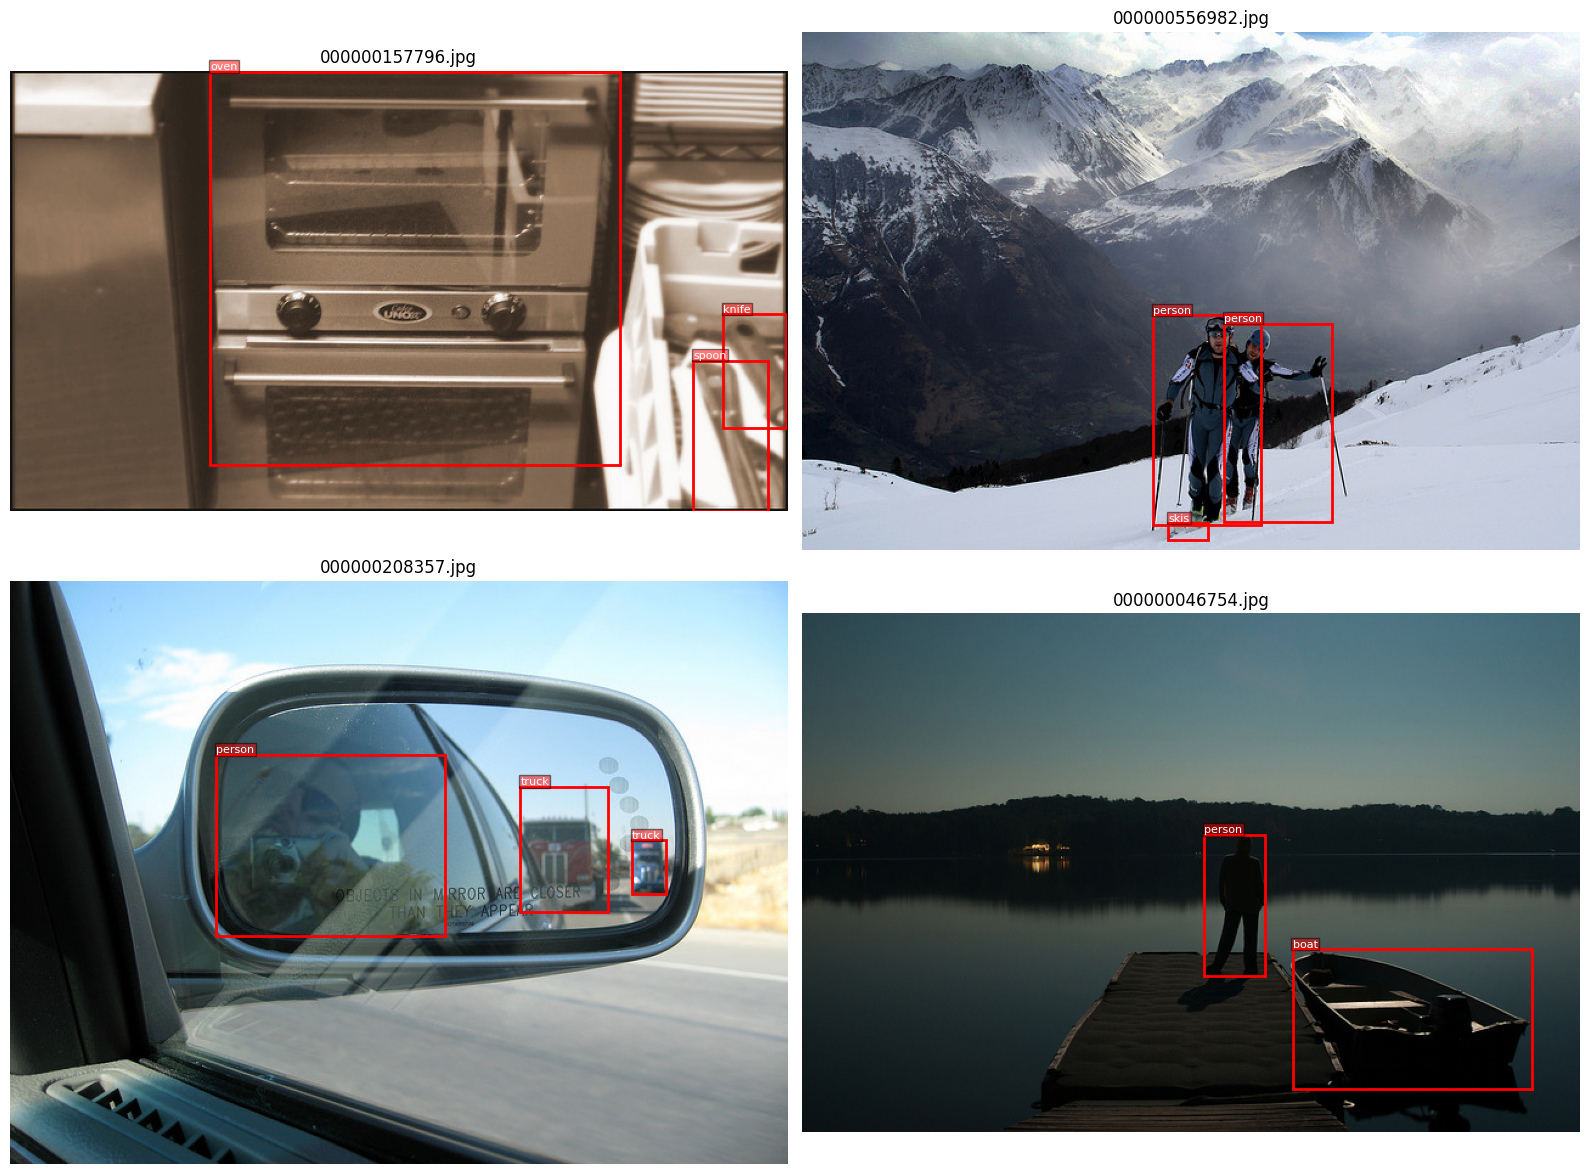

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
from pycocotools.coco import COCO
import os, random
import cv2

# COCO 경로
coco_dir = "/home/jinjinjara1022/AutonomousDriving/datasets/coco"
ann_file = os.path.join(coco_dir, "annotations", "instances_train2017.json")
img_dir = os.path.join(coco_dir, "train2017")

# COCO 객체
coco = COCO(ann_file)

# 랜덤 4장 선택
img_ids = coco.getImgIds()
sample_ids = random.sample(img_ids, 4)

# 2x2 플롯
plt.figure(figsize=(16, 12))

for idx, img_id in enumerate(sample_ids, 1):
    img_info = coco.loadImgs(img_id)[0]
    img_path = os.path.join(img_dir, img_info['file_name'])
    
    # 이미지 로드
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # annotation 로드
    ann_ids = coco.getAnnIds(imgIds=img_id)
    anns = coco.loadAnns(ann_ids)
    
    # 플롯 설정
    ax = plt.subplot(2, 2, idx)
    ax.imshow(image)
    ax.axis('off')
    ax.set_title(img_info['file_name'])
    
    for ann in anns:
        x, y, w, h = ann['bbox']
        category_id = ann['category_id']
        category_name = coco.loadCats(category_id)[0]['name']
        
        ax.add_patch(plt.Rectangle((x, y), w, h,
                                   fill=False, color='red', linewidth=2))
        ax.text(x, y - 2, category_name,
                fontsize=8, color='white',
                bbox=dict(facecolor='red', alpha=0.5, pad=1))

plt.tight_layout()
plt.show()


# Train

In [3]:
#!pip install -U ultralytics pycocotools

In [7]:
from ultralytics import YOLO

yaml_path = "/home/jinjinjara1022/AutonomousDriving/ObjectDetection/_tmp_coco.yaml"
model = YOLO("yolov8n.pt")

# MLflow 끄고 싶으면 한 번만 실행:  !yolo settings mlflow=False

model.train(
    data=yaml_path,
    epochs=3,
    imgsz=640,
    batch=32,
    workers=8,
    device=0,
    amp=True,
    cache='disk',     # 메모리 대신 디스크 캐시(결정적이고 안전)
    project="runs/detect",
    name="coco_yv8n",
    exist_ok=True
)


Ultralytics 8.3.176 🚀 Python-3.10.14 torch-2.7.1+cu126 CUDA:0 (Quadro RTX 5000, 16110MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=disk, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/home/jinjinjara1022/AutonomousDriving/ObjectDetection/_tmp_coco.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=3, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=coco_yv8n, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, pers

train: Scanning /home/jinjinjara1022/AutonomousDriving/datasets/coco/labels/train2017... 118287 images, 1021 backgrounds, 0 corrupt: 100%|██████████| 118287/118287 [01:39<00:00, 1194.65it/s]

train: /home/jinjinjara1022/AutonomousDriving/datasets/coco/images/train2017/000000099844.jpg: 2 duplicate labels removed
train: /home/jinjinjara1022/AutonomousDriving/datasets/coco/images/train2017/000000201706.jpg: 1 duplicate labels removed
train: /home/jinjinjara1022/AutonomousDriving/datasets/coco/images/train2017/000000214087.jpg: 1 duplicate labels removed
train: /home/jinjinjara1022/AutonomousDriving/datasets/coco/images/train2017/000000522365.jpg: 1 duplicate labels removed


train: New cache created: /home/jinjinjara1022/AutonomousDriving/datasets/coco/labels/train2017.cache


train: Caching images (91.2GB Disk): 100%|██████████| 118287/118287 [04:12<00:00, 468.31it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/home/jinjinjara1022/.local/lib/python3.10/site-packages/albumentations/core/validation.py:34: UserWarning: Argument 'quality_range' is not valid and will be ignored.
  warn(


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 212.5±281.2 MB/s, size: 164.4 KB)


val: Scanning /home/jinjinjara1022/AutonomousDriving/datasets/coco/labels/val2017... 5000 images, 48 backgrounds, 0 corrupt: 100%|██████████| 5000/5000 [00:04<00:00, 1186.54it/s]


val: New cache created: /home/jinjinjara1022/AutonomousDriving/datasets/coco/labels/val2017.cache


val: Caching images (3.8GB Disk): 100%|██████████| 5000/5000 [00:10<00:00, 458.89it/s]


Plotting labels to runs/detect/coco_yv8n/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)


2025/08/11 17:00:34 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/08/11 17:00:35 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.


MLflow: logging run_id(fe20a395e37545a68ddef69059287796) to runs/mlflow
MLflow: view at http://127.0.0.1:5000 with 'mlflow server --backend-store-uri runs/mlflow'
MLflow: disable with 'yolo settings mlflow=False'
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/coco_yv8n
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      5.77G       1.15      1.311       1.21        202        640: 100%|██████████| 3697/3697 [14:00<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:32<00:00,  2.45it/s]


                   all       5000      36335      0.623       0.45      0.496      0.348

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3      6.34G      1.155      1.338      1.212        128        640: 100%|██████████| 3697/3697 [13:21<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:21<00:00,  3.62it/s]


                   all       5000      36335      0.607      0.465      0.499      0.352

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3      6.36G      1.148      1.325      1.208        239        640: 100%|██████████| 3697/3697 [13:06<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:21<00:00,  3.69it/s]


                   all       5000      36335      0.612      0.467      0.505      0.356

3 epochs completed in 0.697 hours.
Optimizer stripped from runs/detect/coco_yv8n/weights/last.pt, 6.5MB
Optimizer stripped from runs/detect/coco_yv8n/weights/best.pt, 6.5MB

Validating runs/detect/coco_yv8n/weights/best.pt...
Ultralytics 8.3.176 🚀 Python-3.10.14 torch-2.7.1+cu126 CUDA:0 (Quadro RTX 5000, 16110MiB)
Model summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:25<00:00,  3.14it/s]


                   all       5000      36335      0.611      0.468      0.505      0.356
                person       2693      10777      0.747       0.67      0.739      0.506
               bicycle        149        314      0.672      0.366      0.435      0.253
                   car        535       1918      0.629      0.527      0.557      0.358
            motorcycle        159        367      0.674      0.563      0.644      0.391
              airplane         97        143      0.745      0.748      0.803      0.621
                   bus        189        283      0.784      0.657      0.734      0.603
                 train        157        190      0.756      0.767      0.815      0.631
                 truck        250        414      0.527      0.415      0.433      0.292
                  boat        121        424      0.514      0.317      0.357      0.196
         traffic light        191        634      0.602      0.341      0.392      0.202
          fire hydran

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f57bccc50c0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024

In [8]:
print("✅ Dataset paths ready")

✅ Dataset paths ready


In [9]:
from ultralytics import YOLO
best = "runs/detect/coco_yv8n/weights/best.pt"  # 방금 학습된 모델
model = YOLO(best)

In [10]:
DATA = "/home/jinjinjara1022/AutonomousDriving/ObjectDetection/_tmp_coco.yaml"

metrics = model.val(
    data=DATA,
    split='val',       # val 세트
    imgsz=640,
    batch=32,
    iou=0.7,
    conf=0.001,        # COCO mAP 재현용 낮은 임계치
    save_json=True,    # COCO json 예측 저장
)
print(metrics.results_dict)      # mAP50, mAP50-95 등
print("Results saved to:", metrics.save_dir)

Ultralytics 8.3.176 🚀 Python-3.10.14 torch-2.7.1+cu126 CUDA:0 (Quadro RTX 5000, 16110MiB)
Model summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 338.3±95.6 MB/s, size: 143.9 KB)


val: Scanning /home/jinjinjara1022/AutonomousDriving/datasets/coco/labels/val2017.cache... 5000 images, 48 backgrounds, 0 corrupt: 100%|██████████| 5000/5000 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:44<00:00,  3.49it/s]


                   all       5000      36335      0.611      0.468      0.505      0.356
                person       2693      10777      0.747       0.67      0.738      0.506
               bicycle        149        314       0.67      0.366      0.436      0.253
                   car        535       1918      0.631      0.527      0.558      0.358
            motorcycle        159        367      0.679      0.564      0.644      0.393
              airplane         97        143      0.743      0.741      0.801      0.617
                   bus        189        283       0.79      0.661      0.734      0.605
                 train        157        190      0.752      0.766      0.815       0.63
                 truck        250        414       0.53      0.418      0.433      0.291
                  boat        121        424      0.509      0.316      0.356      0.193
         traffic light        191        634      0.603       0.34      0.392      0.203
          fire hydran

0: 640x640 1 bus, 4.6ms
1: 640x640 5 persons, 1 tie, 1 suitcase, 4 bottles, 1 wine glass, 1 cup, 2 chairs, 4.6ms
2: 640x640 1 person, 1 snowboard, 4.6ms
3: 640x640 1 person, 2 frisbees, 4.6ms
4: 640x640 1 cat, 4.6ms
5: 640x640 1 person, 4.6ms
6: 640x640 3 persons, 1 skateboard, 4.6ms
7: 640x640 1 bird, 4.6ms
8: 640x640 1 person, 1 bench, 1 skateboard, 4.6ms
9: 640x640 1 couch, 1 tv, 1 remote, 4.6ms
10: 640x640 1 airplane, 3 trucks, 4.6ms
11: 640x640 5 persons, 1 tv, 4 remotes, 4.6ms
12: 640x640 7 persons, 4.6ms
13: 640x640 2 bowls, 1 sandwich, 4.6ms
14: 640x640 8 persons, 3 cars, 1 bus, 1 traffic light, 4.6ms
15: 640x640 3 boats, 4.6ms
Speed: 2.5ms preprocess, 4.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


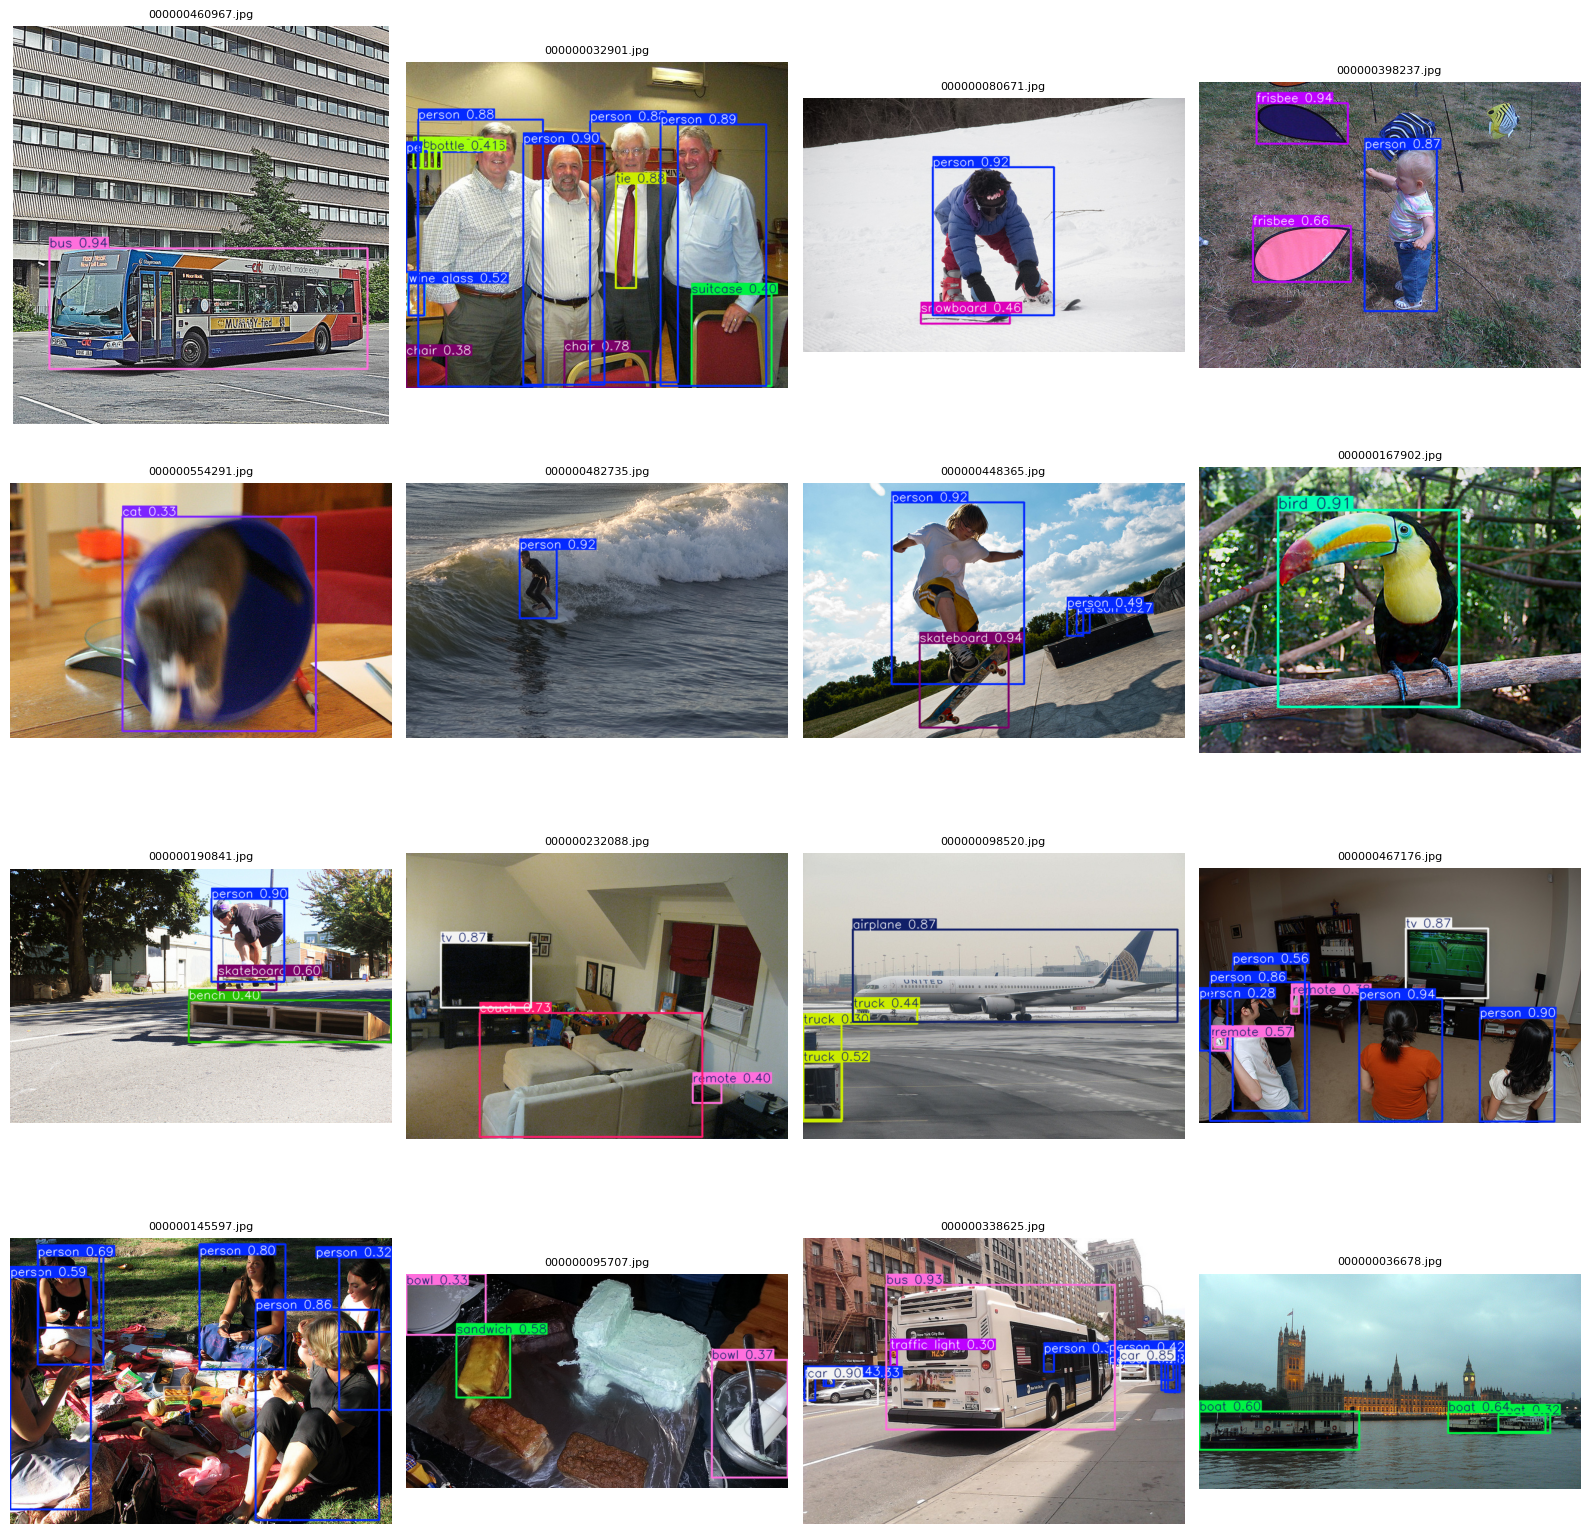

In [13]:
import random, os
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt

VAL_DIR  = Path("/home/jinjinjara1022/AutonomousDriving/datasets/coco/images/val2017")

# 16장 샘플
samples = random.sample([p for p in VAL_DIR.glob("*.jpg")][:5000], 16)

# 예측
res = model.predict(
    source=[str(p) for p in samples],
    imgsz=640, conf=0.25, iou=0.7, device=0, save=False, stream=True
)

# 결과 그리드 표시
plt.figure(figsize=(16, 16))
for idx, (r, p) in enumerate(zip(res, samples)):
    im = r.plot()  # numpy(BGR)
    im = im[:, :, ::-1]  # BGR -> RGB

    ax = plt.subplot(4, 4, idx + 1)
    ax.imshow(im)
    ax.set_title(p.name, fontsize=8)
    ax.axis("off")

plt.tight_layout()
plt.show()